In [19]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("BIKE DETAILS.csv")
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [21]:
data.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [23]:
# 1. What is the range of selling prices in the dataset.


if 'selling_price' in data.columns:
    # Calculate min, max, and range
    min_price = data['selling_price'].min()
    max_price = data['selling_price'].max()
    price_range = max_price - min_price

    # Display results
    print(f"Minimum Selling Price: {min_price}")
    print(f"Maximum Selling Price: {max_price}")
    print(f"Range of Selling Prices: {price_range}")
else:
    print("The dataset must contain a 'Selling_Price' column.")

Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of Selling Prices: 755000


In [24]:
#2. What is the median selling price for bikes in the datasetD

median_price = data['selling_price'].median()
print(f"The median selling price for bikes is: {median_price}")



The median selling price for bikes is: 45000.0


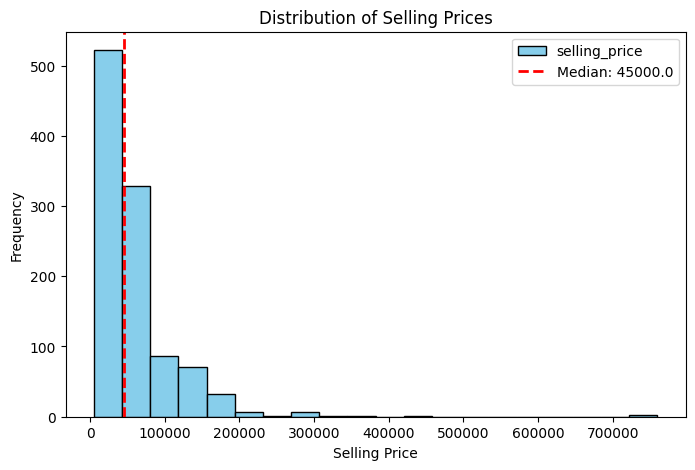

In [25]:
plt.figure(figsize=(8, 5))
data['selling_price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.axvline(median_price, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_price}')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [26]:
#3.  What is the most common seller type.

seller_counts= data.seller_type.value_counts()

In [27]:
most_common_count = seller_counts.max()

    # Display results
print(f"The most common seller type is: {most_common_seller} ({most_common_count} occurrences)")


NameError: name 'most_common_seller' is not defined

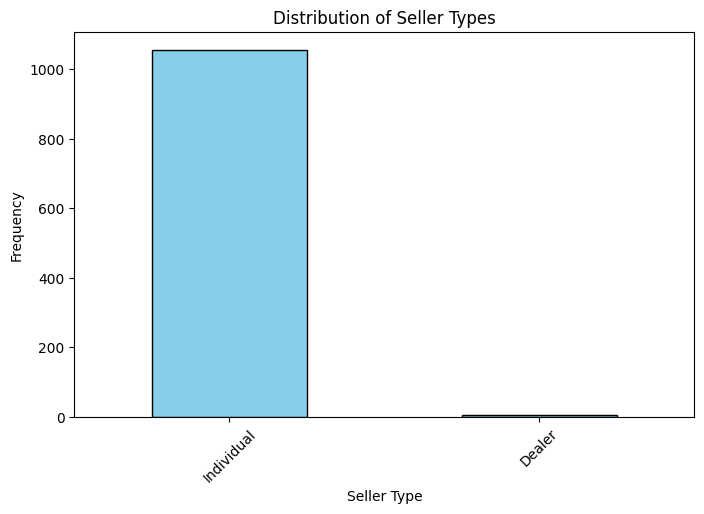

In [18]:
plt.figure(figsize=(8, 5))
seller_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [19]:
#  4 How many bikes have driven more than 50,000 kilometersD

bikes_over_50000 = data[data['km_driven'] > 50000]

    # Count the number of bikes
count_bikes = bikes_over_50000.shape[0]

    # Display the result
print(f"Number of bikes that have driven more than 50,000 kilometers: {count_bikes}")



Number of bikes that have driven more than 50,000 kilometers: 170


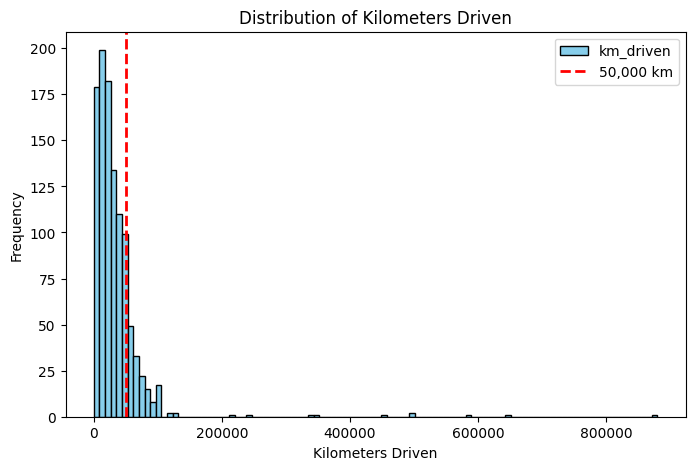

In [23]:
plt.figure(figsize=(8, 5))
data['km_driven'].plot(kind='hist', bins=100, color='skyblue', edgecolor='black')
plt.axvline(50000, color='red', linestyle='dashed', linewidth=2, label='50,000 km')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [29]:
data.columns


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [31]:
#5 What is the average km_driven value for each ownership type.

avg_km_per_ownership = data.groupby('owner')['km_driven'].mean().reset_index()

    # Rename columns for clarity
avg_km_per_ownership.columns = ['Ownership_Type', 'Average_Kilometers_Driven']

    # Display the result
print(avg_km_per_ownership)

  Ownership_Type  Average_Kilometers_Driven
0      1st owner               32816.583333
1      2nd owner               39288.991870
2      3rd owner               33292.181818
3      4th owner              311500.000000


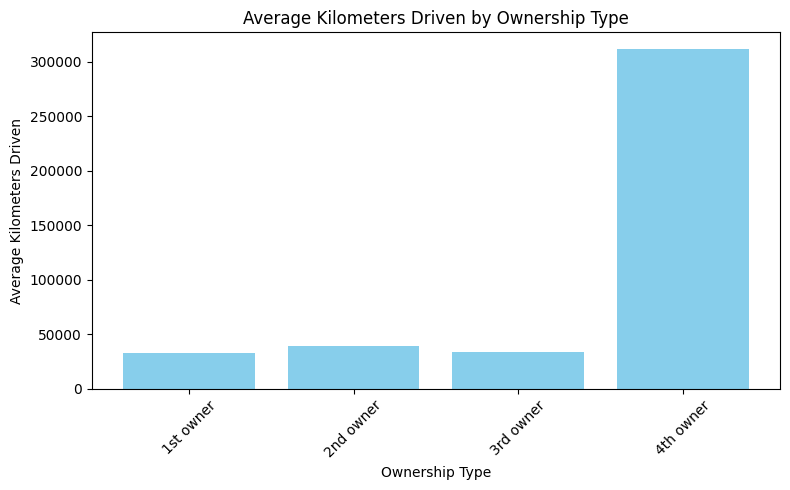

In [33]:
plt.figure(figsize=(8, 5))
plt.bar(avg_km_per_ownership['Ownership_Type'], avg_km_per_ownership['Average_Kilometers_Driven'], color='skyblue')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#6. What proportion of bikes are from the year 2015 or older.

# Filter bikes that are from 2015 or older
bikes_2015_or_older = data[data['year'] <= 2015]

    # Calculate the proportion
proportion_older_bikes = bikes_2015_or_older.shape[0] / data.shape[0]

    # Display the result
print(f"Proportion of bikes from 2015 or older: {proportion_older_bikes:.2f}")


Proportion of bikes from 2015 or older: 0.57


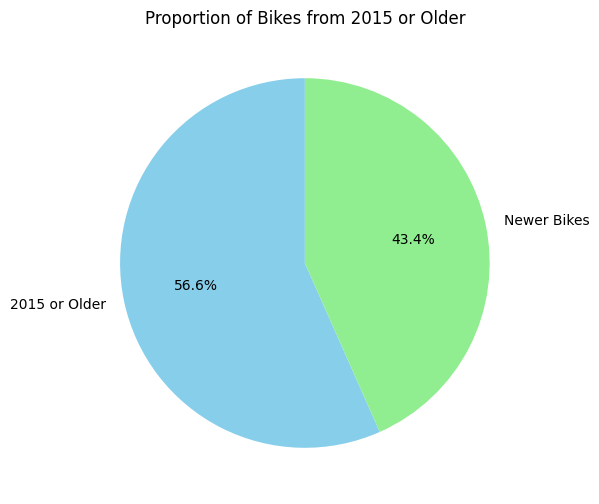

In [35]:
count_older_bikes = bikes_2015_or_older.shape[0]
count_newer_bikes = data.shape[0] - count_older_bikes

# Plotting a pie chart
labels = ['2015 or Older', 'Newer Bikes']
sizes = [count_older_bikes, count_newer_bikes]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proportion of Bikes from 2015 or Older')
plt.show()

Missing Values per Column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of Missing Values per Column:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


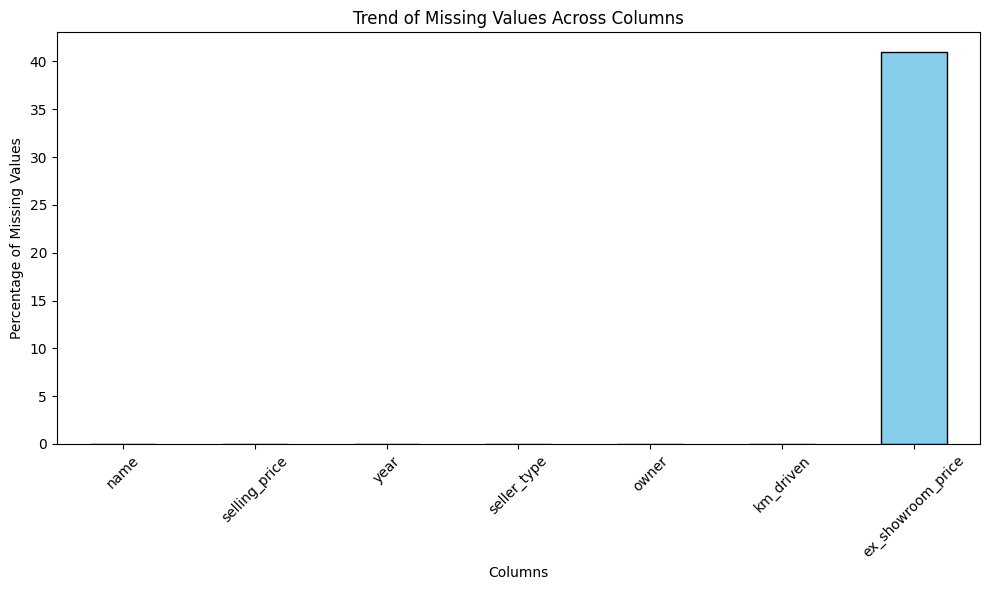

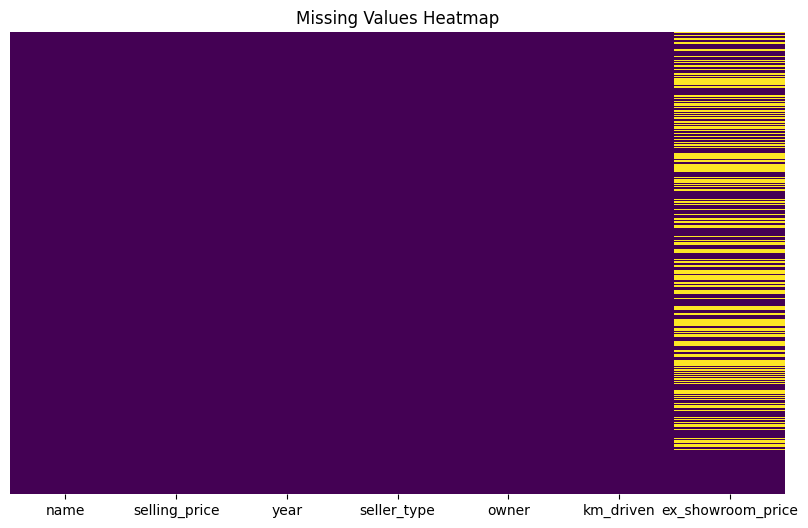

In [36]:
missing_values = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / data.shape[0]) * 100

# Display the missing values and their percentage
print("Missing Values per Column:")
print(missing_values)
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)

# Plotting the missing values trend
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Trend of Missing Values Across Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Heatmap for missing values visualization
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [37]:
#8 What is the highest ex_showroom_price recorded, and for which bike.
max_price_row = data.loc[data['ex_showroom_price'].idxmax()]

    # Extract the highest price and the corresponding bike name
highest_price = max_price_row['ex_showroom_price']
bike_with_highest_price = max_price_row['name']

    # Display the result
print(f"The highest ex-showroom price is {highest_price} for the bike: {bike_with_highest_price}")

The highest ex-showroom price is 1278000.0 for the bike: Harley-Davidson Street Bob


In [38]:
#9 What is the total number of bikes listed by each seller type.

bikes_by_seller_type = data['seller_type'].value_counts().reset_index()

    # Rename columns for clarity
bikes_by_seller_type.columns = ['Seller_Type', 'Total_Bikes_Listed']

    # Display the result
print(bikes_by_seller_type)


  Seller_Type  Total_Bikes_Listed
0  Individual                1055
1      Dealer                   6


<Figure size 800x500 with 0 Axes>

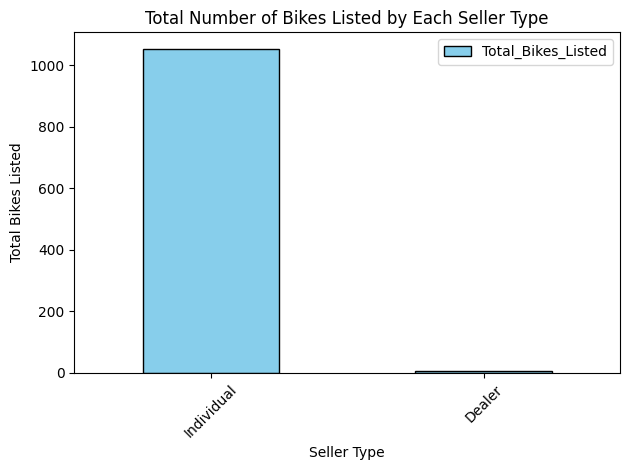

In [39]:
plt.figure(figsize=(8, 5))
bikes_by_seller_type.plot(kind='bar', x='Seller_Type', y='Total_Bikes_Listed', color='skyblue', edgecolor='black')
plt.title('Total Number of Bikes Listed by Each Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Total Bikes Listed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

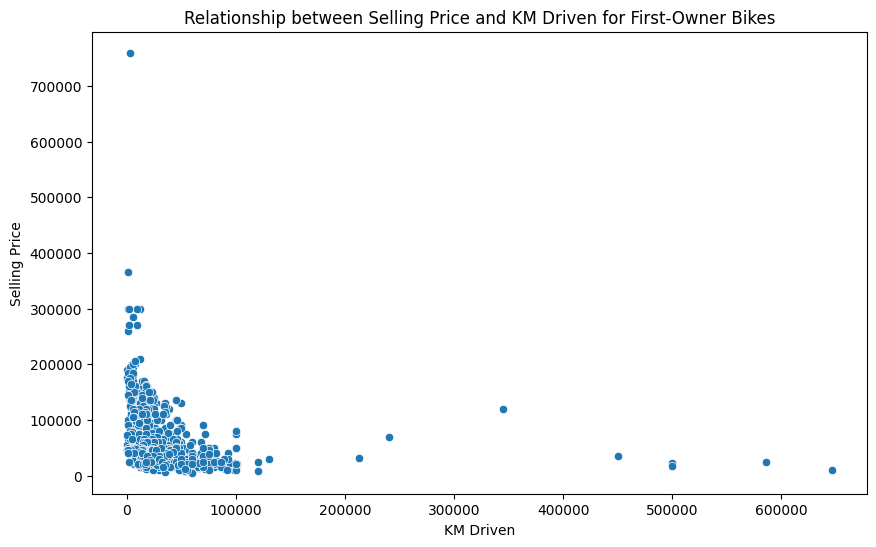

Correlation coefficient: -0.24348174844965698


In [14]:
#10 What is the relationship between selling_price and km_driven for first-owner bikes.
from scipy.stats import pearsonr
first_owner_bikes = data[data['owner'] == '1st owner']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

# Calculate correlation coefficient
correlation, _ = pearsonr(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'])
print(f"Correlation coefficient: {correlation}")



In [15]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.

data['km_driven']

0          350
1         5650
2        12000
3        23000
4        21000
         ...  
1056    500000
1057     33000
1058     35000
1059     53000
1060     92233
Name: km_driven, Length: 1061, dtype: int64

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for km_driven
Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter out outliers
df_cleaned = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]

# Display the number of rows removed
rows_removed = len(data) - len(df_cleaned)
print(f"Number of rows removed: {rows_removed}")

# Save the cleaned dataset
df_cleaned.to_csv('bike_dataset_cleaned.csv', index=False)

Lower Bound: -30750.0, Upper Bound: 87250.0
Number of rows removed: 39


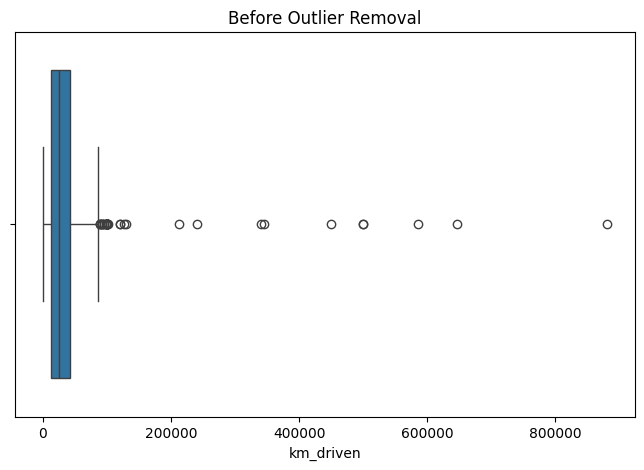

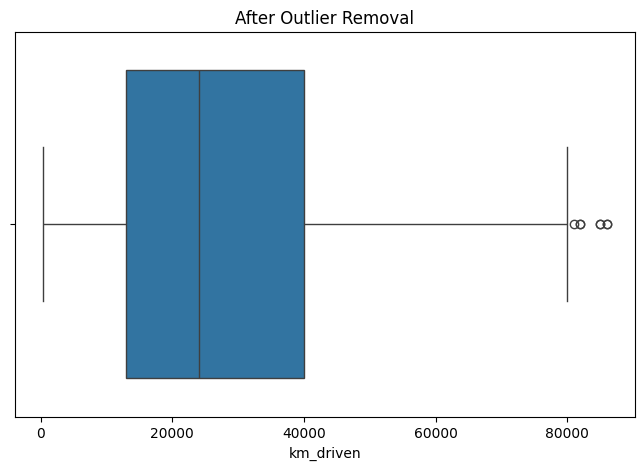

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['km_driven'])
plt.title('Before Outlier Removal')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['km_driven'])
plt.title('After Outlier Removal')
plt.show()

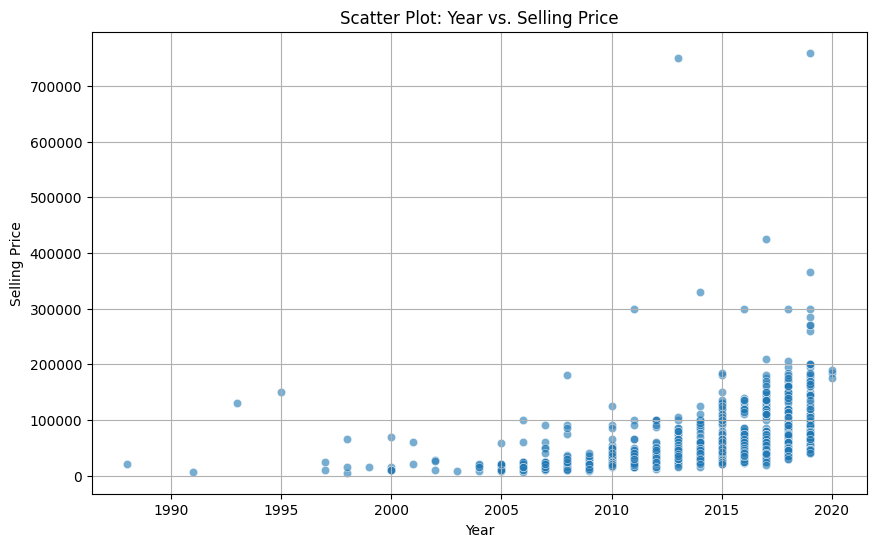

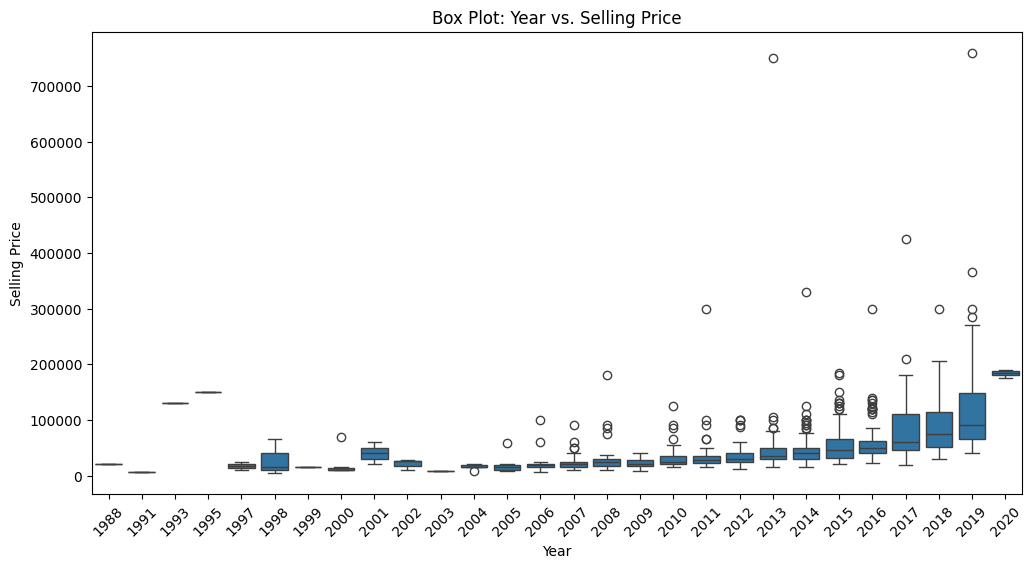

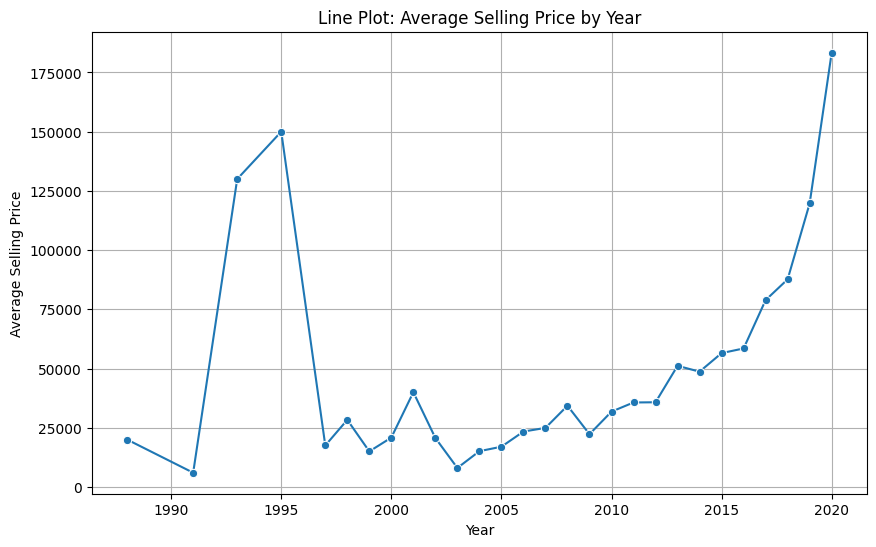

In [18]:
#12 Perform a bivariate analysis to visualize the relationship between year and selling_price.
df = data.dropna(subset=['year', 'selling_price'])

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='year', y='selling_price', alpha=0.6)
plt.title('Scatter Plot: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='year', y='selling_price')
plt.title('Box Plot: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

# Line Plot of Average Selling Price per Year
yearly_avg_price = df.groupby('year')['selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_price, x='year', y='selling_price', marker='o')
plt.title('Line Plot: Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

Average yearly depreciation in selling price: 21332.61


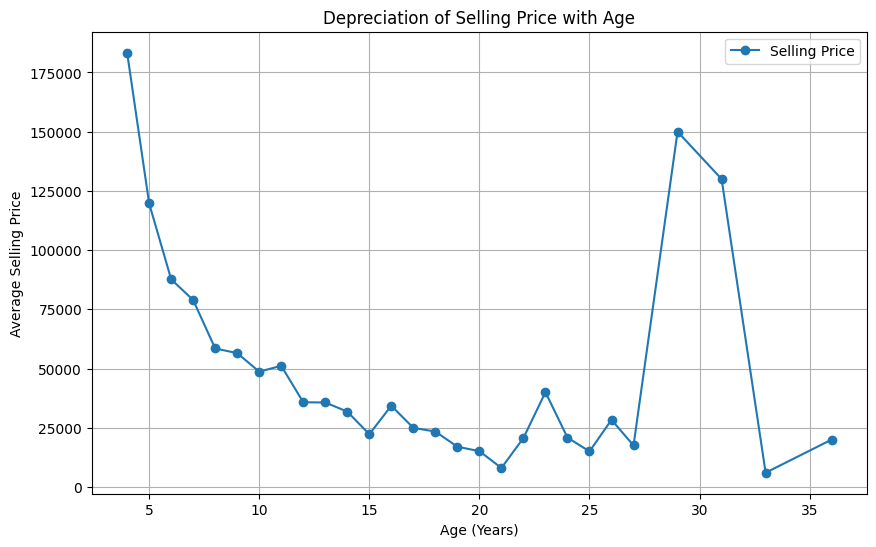

In [19]:
#13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year)D
# Define the current year (replace with the actual year if needed)
current_year = 2024

# Calculate bike age
df['age'] = current_year - df['year']

# Drop rows with missing or invalid values
df = df.dropna(subset=['age', 'selling_price'])
df = df[df['age'] >= 0]  # Exclude invalid ages

# Group by age and calculate average selling price
age_price = df.groupby('age')['selling_price'].mean().reset_index()

# Calculate yearly depreciation (difference in selling price)
age_price['depreciation'] = age_price['selling_price'].diff().abs()

# Average depreciation per year
avg_depreciation = age_price['depreciation'].mean()
print(f"Average yearly depreciation in selling price: {avg_depreciation:.2f}")

# Plot the trend of selling price vs. age
plt.figure(figsize=(10, 6))
plt.plot(age_price['age'], age_price['selling_price'], marker='o', label='Selling Price')
plt.title('Depreciation of Selling Price with Age')
plt.xlabel('Age (Years)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
#14 Which bike names are priced significantly above the average price for their manufacturing year?

data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')

# Drop rows with missing or invalid values
data = data.dropna(subset=['year', 'selling_price'])



In [30]:

yearly_avg_price = data.groupby('year')['selling_price'].mean().reset_index()
yearly_avg_price.rename(columns={'selling_price': 'avg_price'}, inplace=True)


In [31]:
data = data.merge(yearly_avg_price, on='year', how='left')


In [32]:
threshold_factor = 1.5
data['above_avg'] = data['selling_price'] > (data['avg_price'] * threshold_factor)


In [33]:
above_avg_bikes = data[data['above_avg']]

# Display the bike names and details
print(above_avg_bikes[['name', 'year', 'selling_price', 'avg_price']])


                                     name  year  selling_price      avg_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                          Yamaha YZF R3  2019         365000  119689.511628
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
23                          Jawa Standard  2019         180000  119689.511628
..                                    ...   ...            ...            ...
979             Royal Enfield Thunder 500  2015         105000   56500.000000
981             Royal Enfield Thunder 350  2013         105000   51136.986301
983             Royal Enfield Classic 350  2015         100000   56500.000000
984             Royal Enfield Classic 500  2014          95000   48668.131868
985             Royal Enfield Classic 500  2011          90000   35655.721311

[157 rows x 4 columns]


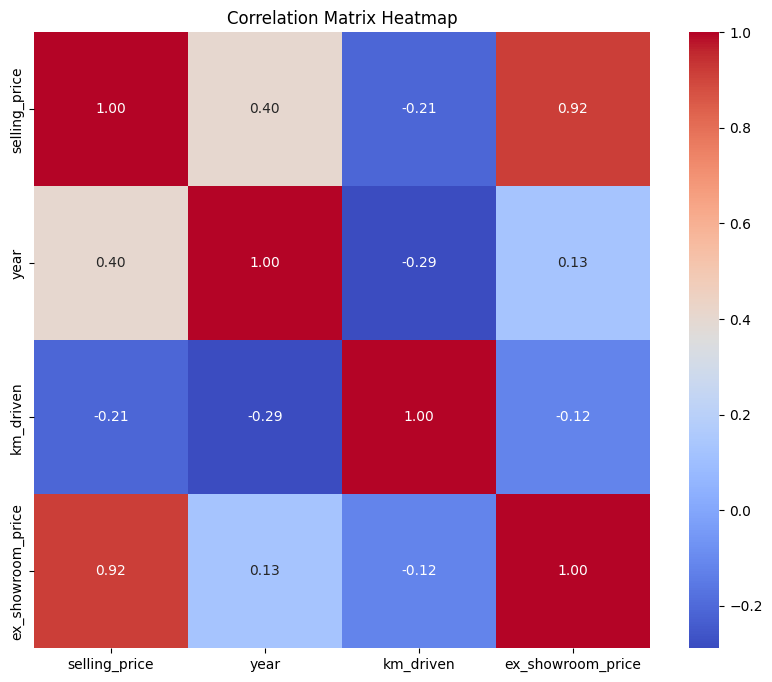

In [28]:
#15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()